In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import matplotlib.pyplot as plt

import drjit as dr
import mitsuba as mi
mi.set_variant('cuda_ad_rgb', 'llvm_ad_rgb')

import config as cf
import integrators
import training
import visualization

Configuration is valid!


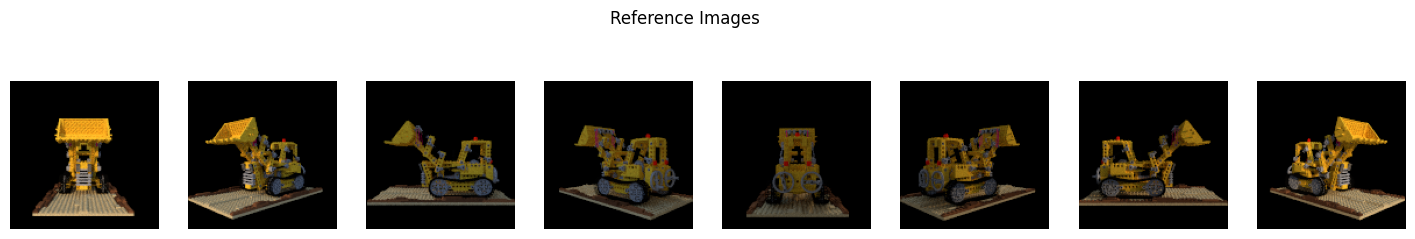

In [2]:
config = cf.create_config(
    "tlir_notebook_test",
    scene_name='lego',
    num_stages=4,
    num_iterations_per_stage=15,
    grid_init_res=16,
    render_res=128,
    sensor_count=8,
    spp=1,
    loss_type='l2'
)

issues = cf.validate_config(config)
if issues:
    print("Configuration issues:", issues)
else:
    print("Configuration is valid!")

sensors = training.create_sensors(
    num_sensors=config.sensor_count,
    render_res=config.render_res,
    center=config.camera_center,
    radius=config.camera_radius
)
scene_ref = training.create_scene_reference(config)
ref_images = [mi.render(scene_ref, sensor=sensors[i], spp=128) for i in range(config.sensor_count)]
visualization.plot_list(ref_images, 'Reference Images')

Configuration is valid!


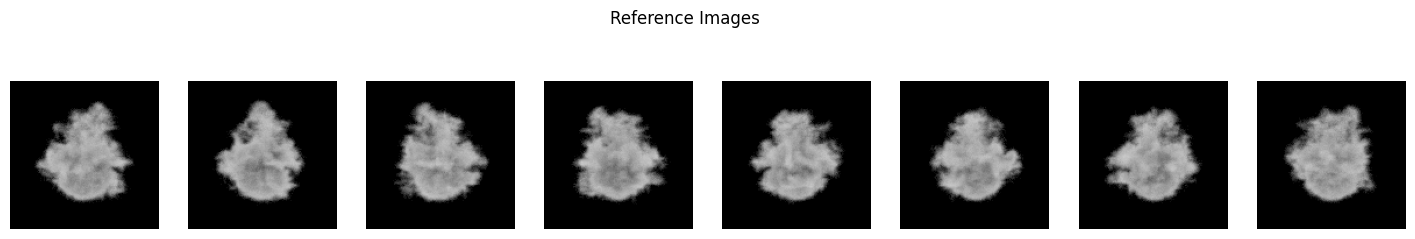

In [3]:
config = cf.create_config(
    "tlir_notebook_test",
    scene_name='fog',
    num_stages=4,
    num_iterations_per_stage=15,
    grid_init_res=16,
    render_res=128,
    sensor_count=8,
    spp=1,
    loss_type='l2'
)

issues = cf.validate_config(config)
if issues:
    print("Configuration issues:", issues)
else:
    print("Configuration is valid!")

sensors = training.create_sensors(
    num_sensors=config.sensor_count,
    render_res=config.render_res,
    center=config.camera_center,
    radius=config.camera_radius
)
scene_ref = training.create_scene_reference(config)
ref_images = [mi.render(scene_ref, sensor=sensors[i], spp=128) for i in range(config.sensor_count)]
visualization.plot_list(ref_images, 'Reference Images')

Stage 01, feature voxel grids resolution -> 16
[18:36:48] Stage 01, Iteration 01: Loss = 1.74781
[18:36:48] Stage 01, Iteration 02: Loss = 1.70967
[18:36:48] Stage 01, Iteration 03: Loss = 1.64981
[18:36:48] Stage 01, Iteration 04: Loss = 1.61381
[18:36:48] Stage 01, Iteration 05: Loss = 1.6103
[18:36:48] Stage 01, Iteration 06: Loss = 1.60946
[18:36:48] Stage 01, Iteration 07: Loss = 1.60382
[18:36:48] Stage 01, Iteration 08: Loss = 1.59726
[18:36:48] Stage 01, Iteration 09: Loss = 1.59259
[18:36:48] Stage 01, Iteration 10: Loss = 1.5904
[18:36:48] Stage 01, Iteration 11: Loss = 1.59
[18:36:48] Stage 01, Iteration 12: Loss = 1.59027
[18:36:48] Stage 01, Iteration 13: Loss = 1.59035
[18:36:48] Stage 01, Iteration 14: Loss = 1.58985
[18:36:48] Stage 01, Iteration 15: Loss = 1.58878
Stage 02, feature voxel grids resolution -> 32
[18:36:48] Stage 02, Iteration 01: Loss = 1.58916
[18:36:49] Stage 02, Iteration 02: Loss = 1.58537
[18:36:49] Stage 02, Iteration 03: Loss = 1.5845
[18:36:49] S

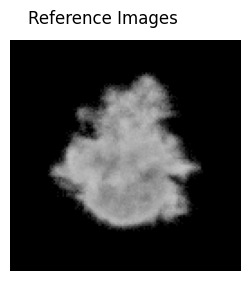

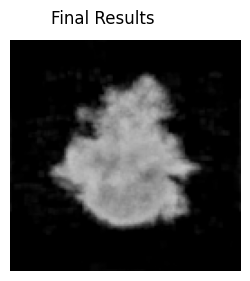

In [4]:
# Set up logger
logger = visualization.TrainingLogger()

# Run training using the modular function
holdout_every = 0
num_holdout = 1

if holdout_every > 0:
    train_indices = [i for i, s in enumerate(sensors) if ((i - 1) % holdout_every) != 0]

    val_indices = [i for i in range(len(sensors)) if i not in train_indices]
else:
    train_indices = range(len(sensors))
    val_indices = range(len(sensors))

sensors_train = [sensors[i] for i in train_indices]
ref_images_train = [ref_images[i] for i in train_indices]

sensors_heldout = [sensors[i] for i in val_indices][:num_holdout]
ref_images_heldout = [ref_images[i] for i in val_indices][:num_holdout]

scene = training.create_scene(config.integrator_type)

results = training.train_radiance_field(
    scene=scene,
    sensors=sensors_train,
    ref_images=ref_images_train,
    config=config,
    progress_callback=logger.log_progress
)

# Render final results
final_images = [mi.render(scene, sensor=sensors_heldout[i], spp=128) for i in range(len(sensors_heldout))]

# Use modular plotting functions
visualization.plot_list(ref_images_heldout, 'Reference Images')
visualization.plot_list(final_images, 'Final Results')

Configuration is valid!
Stage 01, feature voxel grids resolution -> 16
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
[18:37:05] Stage 01, Iteration 01: Loss =

jit_flush_malloc_cache(): Dr.Jit exhausted the available memory and had to flush its allocation cache to free up additional memory. This is an expensive operation and will have a negative effect on performance. You may want to change your computation so that it uses less memory. This warning will only be displayed once.


[18:37:13] Stage 04, Iteration 02: Loss = 1.59113
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
Using RadianceFieldPRBRT integrator.
[18:37:13] Stage 04, Iteration 03: Loss = 1.59086
Using Radian

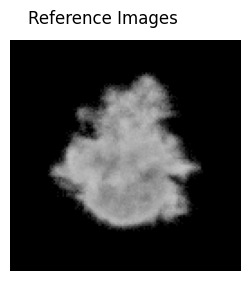

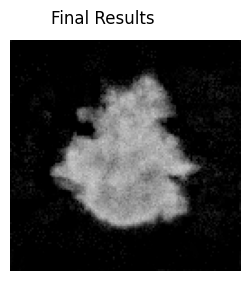

In [5]:
config = cf.create_ratio_tracking_config("tlir_notebook_test")
config.integrator_type='rf_prb_rt'
config.scene_name='fog'
config.num_stages=4
config.num_iterations_per_stage=50
config.grid_init_res=16
config.render_res=128
config.sensor_count=8
config.spp=32
config.loss_type='l2'

issues = cf.validate_config(config)
if issues:
    print("Configuration issues:", issues)
else:
    print("Configuration is valid!")

sensors = training.create_sensors(
    num_sensors=config.sensor_count,
    render_res=config.render_res,
    center=config.camera_center,
    radius=config.camera_radius
)

# Set up logger
logger = visualization.TrainingLogger()

# Run training using the modular function
holdout_every = 0
num_holdout = 1

if holdout_every > 0:
    train_indices = [i for i, s in enumerate(sensors) if ((i - 1) % holdout_every) != 0]

    val_indices = [i for i in range(len(sensors)) if i not in train_indices]
else:
    train_indices = range(len(sensors))
    val_indices = range(len(sensors))

sensors_train = [sensors[i] for i in train_indices]
ref_images_train = [ref_images[i] for i in train_indices]

sensors_heldout = [sensors[i] for i in val_indices][:num_holdout]
ref_images_heldout = [ref_images[i] for i in val_indices][:num_holdout]

scene = training.create_scene(config.integrator_type)

results = training.train_radiance_field(
    scene=scene,
    sensors=sensors_train,
    ref_images=ref_images_train,
    config=config,
    progress_callback=logger.log_progress
)

# Render final results
final_images = [mi.render(scene, sensor=sensors_heldout[i], spp=128) for i in range(len(sensors_heldout))]

# Use modular plotting functions
visualization.plot_list(ref_images_heldout, 'Reference Images')
visualization.plot_list(final_images, 'Final Results')

Configuration is valid!
Stage 01, feature voxel grids resolution -> 16
[18:37:19] Stage 01, Iteration 01: Loss = 1.74776
[18:37:19] Stage 01, Iteration 02: Loss = 1.70802
[18:37:19] Stage 01, Iteration 03: Loss = 1.64959
[18:37:19] Stage 01, Iteration 04: Loss = 1.62126
[18:37:19] Stage 01, Iteration 05: Loss = 1.62065
[18:37:19] Stage 01, Iteration 06: Loss = 1.61622
[18:37:19] Stage 01, Iteration 07: Loss = 1.60709
[18:37:19] Stage 01, Iteration 08: Loss = 1.59952
[18:37:20] Stage 01, Iteration 09: Loss = 1.59633
[18:37:20] Stage 01, Iteration 10: Loss = 1.59558
[18:37:20] Stage 01, Iteration 11: Loss = 1.59683
[18:37:20] Stage 01, Iteration 12: Loss = 1.59683
[18:37:20] Stage 01, Iteration 13: Loss = 1.59628
[18:37:20] Stage 01, Iteration 14: Loss = 1.59555
[18:37:20] Stage 01, Iteration 15: Loss = 1.59409
[18:37:20] Stage 01, Iteration 16: Loss = 1.59331
[18:37:20] Stage 01, Iteration 17: Loss = 1.59311
[18:37:20] Stage 01, Iteration 18: Loss = 1.59329
[18:37:20] Stage 01, Iteratio

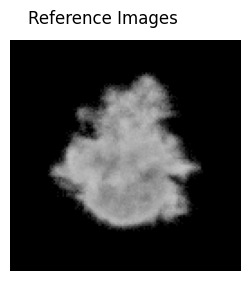

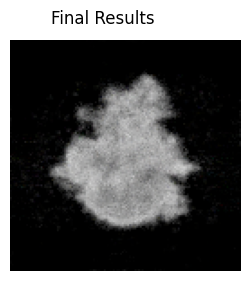

In [6]:
config = cf.create_ratio_tracking_config("tlir_notebook_test")
config.integrator_type='rf_prb_drt'
config.scene_name='fog'
config.num_stages=4
config.num_iterations_per_stage=50
config.grid_init_res=16
config.render_res=128
config.sensor_count=8
config.spp=32
config.loss_type='l2'

issues = cf.validate_config(config)
if issues:
    print("Configuration issues:", issues)
else:
    print("Configuration is valid!")

sensors = training.create_sensors(
    num_sensors=config.sensor_count,
    render_res=config.render_res,
    center=config.camera_center,
    radius=config.camera_radius
)

# Set up logger
logger = visualization.TrainingLogger()

# Run training using the modular function
holdout_every = 0
num_holdout = 1

if holdout_every > 0:
    train_indices = [i for i, s in enumerate(sensors) if ((i - 1) % holdout_every) != 0]

    val_indices = [i for i in range(len(sensors)) if i not in train_indices]
else:
    train_indices = range(len(sensors))
    val_indices = range(len(sensors))

sensors_train = [sensors[i] for i in train_indices]
ref_images_train = [ref_images[i] for i in train_indices]

sensors_heldout = [sensors[i] for i in val_indices][:num_holdout]
ref_images_heldout = [ref_images[i] for i in val_indices][:num_holdout]

scene = training.create_scene(config.integrator_type)

results = training.train_radiance_field(
    scene=scene,
    sensors=sensors_train,
    ref_images=ref_images_train,
    config=config,
    progress_callback=logger.log_progress
)

# Render final results
final_images = [mi.render(scene, sensor=sensors_heldout[i], spp=128) for i in range(len(sensors_heldout))]

# Use modular plotting functions
visualization.plot_list(ref_images_heldout, 'Reference Images')
visualization.plot_list(final_images, 'Final Results')

Configuration is valid!
[18:37:36] Stage 01, Iteration 01: Loss = 0.479972
[18:37:36] Stage 01, Iteration 02: Loss = 0.359832
[18:37:37] Stage 01, Iteration 03: Loss = 0.294357
[18:37:37] Stage 01, Iteration 04: Loss = 0.25593
[18:37:37] Stage 01, Iteration 05: Loss = 0.230276
[18:37:38] Stage 01, Iteration 06: Loss = 0.210175
[18:37:38] Stage 01, Iteration 07: Loss = 0.195915
[18:37:39] Stage 01, Iteration 08: Loss = 0.183814
[18:37:39] Stage 01, Iteration 09: Loss = 0.171949
[18:37:39] Stage 01, Iteration 10: Loss = 0.159785
[18:37:40] Stage 01, Iteration 11: Loss = 0.150938
[18:37:40] Stage 01, Iteration 12: Loss = 0.1486
[18:37:40] Stage 01, Iteration 13: Loss = 0.138589
[18:37:41] Stage 01, Iteration 14: Loss = 0.136362
[18:37:41] Stage 01, Iteration 15: Loss = 0.131063
[18:37:42] Stage 01, Iteration 16: Loss = 0.129251
[18:37:42] Stage 01, Iteration 17: Loss = 0.126097
[18:37:42] Stage 01, Iteration 18: Loss = 0.125514
[18:37:43] Stage 01, Iteration 19: Loss = 0.122928
[18:37:43]

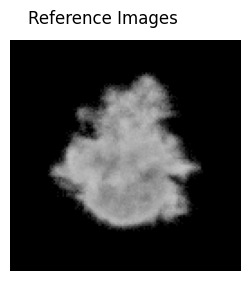

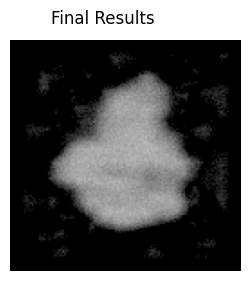

In [7]:
config = cf.create_ratio_tracking_config("tlir_notebook_test")
config.integrator_type='prb_volpath'
config.scene_name='fog'
config.num_stages=2
config.num_iterations_per_stage=20
config.grid_init_res=16
config.render_res=128
config.sensor_count=8
config.spp=8
config.loss_type='l2'
config.learning_rate=0.2
config.use_relu = True # not really because we use it but so training_stage works

issues = cf.validate_config(config)
if issues:
    print("Configuration issues:", issues)
else:
    print("Configuration is valid!")

sensors = training.create_sensors(
    num_sensors=config.sensor_count,
    render_res=config.render_res,
    center=config.camera_center,
    radius=config.camera_radius
)

# Set up logger
logger = visualization.TrainingLogger()

# Run training using the modular function
holdout_every = 0
num_holdout = 1

if holdout_every > 0:
    train_indices = [i for i, s in enumerate(sensors) if ((i - 1) % holdout_every) != 0]

    val_indices = [i for i in range(len(sensors)) if i not in train_indices]
else:
    train_indices = range(len(sensors))
    val_indices = range(len(sensors))

sensors_train = [sensors[i] for i in train_indices]
ref_images_train = [ref_images[i] for i in train_indices]

sensors_heldout = [sensors[i] for i in val_indices][:num_holdout]
ref_images_heldout = [ref_images[i] for i in val_indices][:num_holdout]

scene = training.create_scene(config.integrator_type)

results = training.train_prb_volpath(
    scene=scene,
    sensors=sensors_train,
    ref_images=ref_images_train,
    config=config,
    progress_callback=logger.log_progress
)

# Render final results
final_images = [mi.render(scene, sensor=sensors_heldout[i], spp=128) for i in range(len(sensors_heldout))]

# Use modular plotting functions
visualization.plot_list(ref_images_heldout, 'Reference Images')
visualization.plot_list(final_images, 'Final Results')